In [1]:
# load libraries and scripts
import JSON
using Plots
using HDF5
using Trapz
using Statistics
using SparseArrays
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/disturbances.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/vectorize.jl")

vectorize (generic function with 1 method)

In [2]:
#load borders
border = import_border("../data/borders/border.json");

In [3]:
# create the lattice grid
dx = 20.0
Nx, Ny, xrange, yrange, isinside, isborder, n, isgrid = get_grid(border, Float64(dx));

In [6]:
# compute or load grid parameters
recompute_param = true
sigma = 200.0
if(recompute_param || !isfile("../numerics/grid_params_" * string(dx) * ".h5"))
    bx, by, p, m, d = get_params(isinside, isborder, n, Float64(dx), yrange, xrange, "../data/disc/pantagruel_prev.h5",
        "../numerics/grid_params_" * string(dx) * ".h5", sigma=sigma)
else
    bx, by, p, m, d = get_params(isinside, "../numerics/grid_params_" * string(dx) * ".h5");
end

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [ ]:
minimum(bx[isgrid])

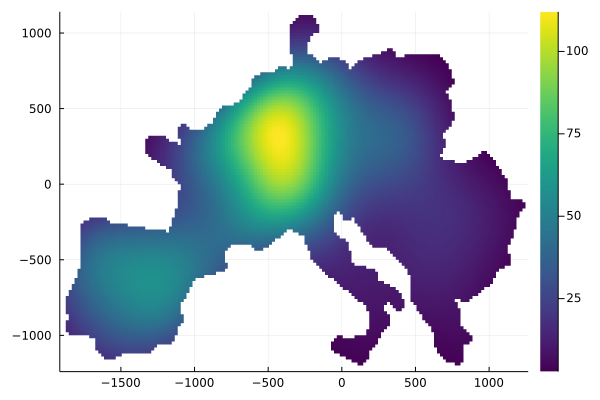

In [19]:
hm_plot(isgrid, xrange, yrange, by)

In [ ]:
# compute or load grid parameters
recompute_param = true
# sigma = 100.0
if(recompute_param || !isfile("../numerics/grid_params_" * string(dx) * ".h5"))
    bx, by, p, m, d = get_params_diff(isinside, n, Float64(dx), yrange, xrange, "../data/disc/pantagruel.h5",
        "../numerics/grid_params_" * string(dx) * ".h5", Niter = 10000, dmax = 10.0, patch=0.003, bmin=0.01)
else
    bx, by, p, m, d = get_params(isinside, "../numerics/grid_params_" * string(dx) * ".h5");
end

In [8]:
th0, ~ = compute_stable_sol(isinside, n, bx, by, p)

[1000.0 0.0011540031378503013]
[2000.0 0.0007194848047267222]
[3000.0 0.0004600341401541641]
[4000.0 0.00031744798319621736]
[5000.0 0.0002200392950353347]
[6000.0 0.00015519794143115107]
[7000.0 0.0001118940184596795]
[8000.0 8.255996253803133e-5]
[9000.0 6.26246186230528e-5]
[10000.0 5.0071720343547454e-5]
[11000.0 3.9781277058725806e-5]
[12000.0 3.138037782024483e-5]
[13000.0 2.4589944564556987e-5]
[14000.0 2.031178094563657e-5]
[15000.0 1.702084525101455e-5]
 28.726326 seconds (1.07 G allocations: 15.959 GiB, 3.65% gc time, 1.50% compilation time)


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

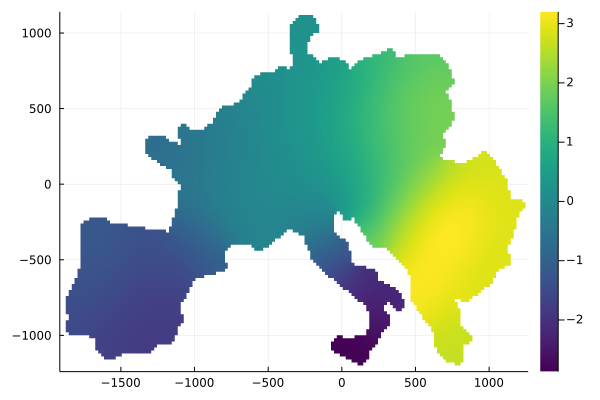

In [9]:
hm_plot(isgrid, xrange, yrange, th0)

In [ ]:
m = 1e-5 * ones(Ny, Nx)
d = 0.6 * m
bx = 8 * ones(Ny, Nx)
by = 8 * ones(Ny, Nx)
p = zeros(Ny, Nx)
m[.!isgrid] .= 0
d[.!isgrid] .= 0
p[.!isgrid] .= 0

In [10]:
isinsideflat, bxflat, byflat, pflat, minvflat, gammaflat, bflat, xneigh, yneigh = vectorize(isinside, n, bx, by, p, m, d);

Synchronized frequency: -0.15145905072578877


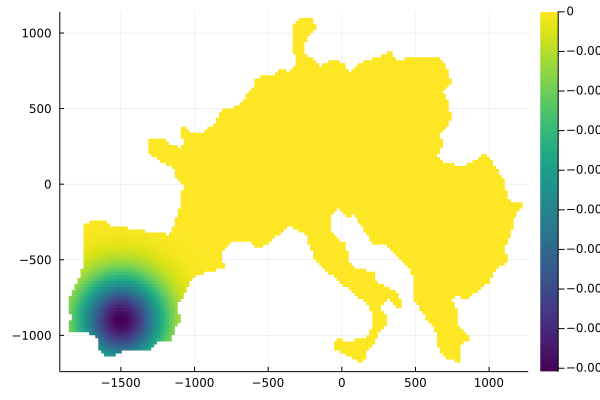

In [11]:
# define a disturbance
dP = -9.0
# dP = 0.0
sigma = 200.0
location = [-1500.0, -900.0]
dp = local_disturbance(isgrid, xrange, yrange, location, dP, sigma)
dpflat = vec(dp)
println("Synchronized frequency: ", trapz((yrange, xrange), p .+ dp) / trapz((yrange, xrange), d))
hm_plot(isinside, xrange, yrange, dp)


In [16]:
int = 200
dt = 0.0001
tf = 50.0
nit = tf / dt

ts, thetas, omegas = perform_dyn_sim_vec(isinsideflat, bxflat, byflat, xneigh, yneigh, bflat, pflat.+dpflat, minvflat, gammaflat, vec(th0), interval = int, Ndt = Int64(nit), dt = dt);

Total time: 50.0
NIter: 200 Avg. Omega: -0.0026440777795104027
NIter: 400 Avg. Omega: -0.005251757435475576
NIter: 600 Avg. Omega: -0.007826535184553002
NIter: 800 Avg. Omega: -0.010344424862213993
NIter: 1000 Avg. Omega: -0.012809582695138363
NIter: 1200 Avg. Omega: -0.015223605420086076
NIter: 1400 Avg. Omega: -0.017581963488855257
NIter: 1600 Avg. Omega: -0.019887023400392514
NIter: 1800 Avg. Omega: -0.022140266691829138
NIter: 2000 Avg. Omega: -0.024346665021669926
NIter: 2200 Avg. Omega: -0.026508225906483125
NIter: 2400 Avg. Omega: -0.028626393761188054
NIter: 2600 Avg. Omega: -0.030703606668574475
NIter: 2800 Avg. Omega: -0.03273989911239171
NIter: 3000 Avg. Omega: -0.03473335810221148
NIter: 3200 Avg. Omega: -0.03668280866416183
NIter: 3400 Avg. Omega: -0.038586951936929945
NIter: 3600 Avg. Omega: -0.04044196327977847
NIter: 3800 Avg. Omega: -0.04224590253496698
NIter: 4000 Avg. Omega: -0.04399666667921161
NIter: 4200 Avg. Omega: -0.04569074537384027
NIter: 4400 Avg. Omega: -0.

NIter: 35800 Avg. Omega: -0.032774602645368946
NIter: 36000 Avg. Omega: -0.033449046672169455
NIter: 36200 Avg. Omega: -0.03413806146647241
NIter: 36400 Avg. Omega: -0.034841562229267084
NIter: 36600 Avg. Omega: -0.035559277872383235
NIter: 36800 Avg. Omega: -0.03629116180036501
NIter: 37000 Avg. Omega: -0.037037425959458574
NIter: 37200 Avg. Omega: -0.037798071182882524
NIter: 37400 Avg. Omega: -0.03857330243768045
NIter: 37600 Avg. Omega: -0.039362253703191546
NIter: 37800 Avg. Omega: -0.04016540414087203
NIter: 38000 Avg. Omega: -0.04098346220017466
NIter: 38200 Avg. Omega: -0.04181510563890461
NIter: 38400 Avg. Omega: -0.04266162213345339
NIter: 38600 Avg. Omega: -0.04352343483073207
NIter: 38800 Avg. Omega: -0.044399433775899874
NIter: 39000 Avg. Omega: -0.04529113489257547
NIter: 39200 Avg. Omega: -0.04619873921719004
NIter: 39400 Avg. Omega: -0.04712221310086781
NIter: 39600 Avg. Omega: -0.04806143443496487
NIter: 39800 Avg. Omega: -0.0490164962677711
NIter: 40000 Avg. Omega: -0

NIter: 71800 Avg. Omega: -0.07347840169669077
NIter: 72000 Avg. Omega: -0.07303869546905527
NIter: 72200 Avg. Omega: -0.07260312658949974
NIter: 72400 Avg. Omega: -0.0721728499863926
NIter: 72600 Avg. Omega: -0.07174756488004308
NIter: 72800 Avg. Omega: -0.07132727353832853
NIter: 73000 Avg. Omega: -0.07091308780446967
NIter: 73200 Avg. Omega: -0.07050448219503995
NIter: 73400 Avg. Omega: -0.07010122003059026
NIter: 73600 Avg. Omega: -0.06970249500788524
NIter: 73800 Avg. Omega: -0.06930781101551889
NIter: 74000 Avg. Omega: -0.06891707293922823
NIter: 74200 Avg. Omega: -0.0685293129330426
NIter: 74400 Avg. Omega: -0.06814447141391214
NIter: 74600 Avg. Omega: -0.06776273230375535
NIter: 74800 Avg. Omega: -0.06738384823858803
NIter: 75000 Avg. Omega: -0.06700809367046426
NIter: 75200 Avg. Omega: -0.06663590494388896
NIter: 75400 Avg. Omega: -0.0662675941222768
NIter: 75600 Avg. Omega: -0.06590472258635982
NIter: 75800 Avg. Omega: -0.06554810502359038
NIter: 76000 Avg. Omega: -0.065198659

NIter: 107400 Avg. Omega: -0.10143351702924511
NIter: 107600 Avg. Omega: -0.10125141373464983
NIter: 107800 Avg. Omega: -0.10106084919374746
NIter: 108000 Avg. Omega: -0.10086244699965036
NIter: 108200 Avg. Omega: -0.10065637839527147
NIter: 108400 Avg. Omega: -0.10044299479439289
NIter: 108600 Avg. Omega: -0.10022292730021598
NIter: 108800 Avg. Omega: -0.09999648492120022
NIter: 109000 Avg. Omega: -0.09976465670603626
NIter: 109200 Avg. Omega: -0.09952830003060835
NIter: 109400 Avg. Omega: -0.09928787128547696
NIter: 109600 Avg. Omega: -0.09904415813586753
NIter: 109800 Avg. Omega: -0.09879759214959427
NIter: 110000 Avg. Omega: -0.09854869688130087
NIter: 110200 Avg. Omega: -0.09829832006297846
NIter: 110400 Avg. Omega: -0.09804633348317537
NIter: 110600 Avg. Omega: -0.0977932568131994
NIter: 110800 Avg. Omega: -0.09753934577782544
NIter: 111000 Avg. Omega: -0.09728429084282475
NIter: 111200 Avg. Omega: -0.09702904772409028
NIter: 111400 Avg. Omega: -0.09677356934287903
NIter: 111600 

NIter: 142600 Avg. Omega: -0.09136825981694686
NIter: 142800 Avg. Omega: -0.0915001450063477
NIter: 143000 Avg. Omega: -0.0916295992631488
NIter: 143200 Avg. Omega: -0.0917563617957014
NIter: 143400 Avg. Omega: -0.09188106170377519
NIter: 143600 Avg. Omega: -0.0920030694046033
NIter: 143800 Avg. Omega: -0.09212243954771708
NIter: 144000 Avg. Omega: -0.09223926263674882
NIter: 144200 Avg. Omega: -0.09235274844130766
NIter: 144400 Avg. Omega: -0.09246352780109508
NIter: 144600 Avg. Omega: -0.09257082498980858
NIter: 144800 Avg. Omega: -0.09267433318050869
NIter: 145000 Avg. Omega: -0.0927742960354541
NIter: 145200 Avg. Omega: -0.09286975148866469
NIter: 145400 Avg. Omega: -0.09296127383160009
NIter: 145600 Avg. Omega: -0.09304889322414059
NIter: 145800 Avg. Omega: -0.09313206875770352
NIter: 146000 Avg. Omega: -0.093211542884989
NIter: 146200 Avg. Omega: -0.09328714815364231
NIter: 146400 Avg. Omega: -0.09335872716678914
NIter: 146600 Avg. Omega: -0.09342678726661185
NIter: 146800 Avg. O

NIter: 177600 Avg. Omega: -0.08874114405525971
NIter: 177800 Avg. Omega: -0.08878025104574605
NIter: 178000 Avg. Omega: -0.08882119726911714
NIter: 178200 Avg. Omega: -0.08886340153495416
NIter: 178400 Avg. Omega: -0.08890648760326465
NIter: 178600 Avg. Omega: -0.08895080185351531
NIter: 178800 Avg. Omega: -0.08899571464581617
NIter: 179000 Avg. Omega: -0.08904137825048476
NIter: 179200 Avg. Omega: -0.08908769352840615
NIter: 179400 Avg. Omega: -0.08913428693599675
NIter: 179600 Avg. Omega: -0.08918134514875305
NIter: 179800 Avg. Omega: -0.08922879198258803
NIter: 180000 Avg. Omega: -0.08927630073076745
NIter: 180200 Avg. Omega: -0.08932418202367394
NIter: 180400 Avg. Omega: -0.08937246058054439
NIter: 180600 Avg. Omega: -0.08942090589240427
NIter: 180800 Avg. Omega: -0.08947004220367799
NIter: 181000 Avg. Omega: -0.08951947306001419
NIter: 181200 Avg. Omega: -0.08956944010694103
NIter: 181400 Avg. Omega: -0.08961992303309096
NIter: 181600 Avg. Omega: -0.08967063451856286
NIter: 181800

NIter: 212600 Avg. Omega: -0.08965941745319075
NIter: 212800 Avg. Omega: -0.08961680805562611
NIter: 213000 Avg. Omega: -0.08957520320423416
NIter: 213200 Avg. Omega: -0.08953508649242534
NIter: 213400 Avg. Omega: -0.08949623984955411
NIter: 213600 Avg. Omega: -0.08945900336143106
NIter: 213800 Avg. Omega: -0.08942351750934527
NIter: 214000 Avg. Omega: -0.08938957088378939
NIter: 214200 Avg. Omega: -0.08935733337203765
NIter: 214400 Avg. Omega: -0.08932688588858993
NIter: 214600 Avg. Omega: -0.08929796422032402
NIter: 214800 Avg. Omega: -0.08927081484215808
NIter: 215000 Avg. Omega: -0.0892453010396614
NIter: 215200 Avg. Omega: -0.08922127781347577
NIter: 215400 Avg. Omega: -0.08919895346114104
NIter: 215600 Avg. Omega: -0.08917779477304254
NIter: 215800 Avg. Omega: -0.08915816966530406
NIter: 216000 Avg. Omega: -0.08913984640612214
NIter: 216200 Avg. Omega: -0.08912274304656431
NIter: 216400 Avg. Omega: -0.08910733944550668
NIter: 216600 Avg. Omega: -0.08909300956630871
NIter: 216800 

NIter: 247800 Avg. Omega: -0.09157984808596896
NIter: 248000 Avg. Omega: -0.09155828534228322
NIter: 248200 Avg. Omega: -0.09153606087128328
NIter: 248400 Avg. Omega: -0.09151341068129716
NIter: 248600 Avg. Omega: -0.0914902842422841
NIter: 248800 Avg. Omega: -0.09146666815867398
NIter: 249000 Avg. Omega: -0.09144263322654593
NIter: 249200 Avg. Omega: -0.0914179978985291
NIter: 249400 Avg. Omega: -0.09139286355929506
NIter: 249600 Avg. Omega: -0.09136724220377697
NIter: 249800 Avg. Omega: -0.09134135936919838
NIter: 250000 Avg. Omega: -0.09131534465827207
NIter: 250200 Avg. Omega: -0.09128910371958367
NIter: 250400 Avg. Omega: -0.0912626282522588
NIter: 250600 Avg. Omega: -0.09123576685387336
NIter: 250800 Avg. Omega: -0.09120865399590136
NIter: 251000 Avg. Omega: -0.09118139782976119
NIter: 251200 Avg. Omega: -0.09115404424321724
NIter: 251400 Avg. Omega: -0.09112655820952899
NIter: 251600 Avg. Omega: -0.09109893263063303
NIter: 251800 Avg. Omega: -0.09107105642274035
NIter: 252000 Av

NIter: 283000 Avg. Omega: -0.09102627413611532
NIter: 283200 Avg. Omega: -0.09103709552428814
NIter: 283400 Avg. Omega: -0.09104790357938437
NIter: 283600 Avg. Omega: -0.0910586905509118
NIter: 283800 Avg. Omega: -0.09106943577506037
NIter: 284000 Avg. Omega: -0.09108007459712977
NIter: 284200 Avg. Omega: -0.09109055069077654
NIter: 284400 Avg. Omega: -0.09110101140013643
NIter: 284600 Avg. Omega: -0.09111143683501859
NIter: 284800 Avg. Omega: -0.09112169082410129
NIter: 285000 Avg. Omega: -0.09113192897429614
NIter: 285200 Avg. Omega: -0.09114199076360384
NIter: 285400 Avg. Omega: -0.09115187493470646
NIter: 285600 Avg. Omega: -0.09116171739880193
NIter: 285800 Avg. Omega: -0.0911712970066096
NIter: 286000 Avg. Omega: -0.09118063970514888
NIter: 286200 Avg. Omega: -0.0911898657605182
NIter: 286400 Avg. Omega: -0.09119873855374007
NIter: 286600 Avg. Omega: -0.09120742298393428
NIter: 286800 Avg. Omega: -0.09121596552252055
NIter: 287000 Avg. Omega: -0.09122407109828062
NIter: 287200 Av

NIter: 318200 Avg. Omega: -0.0905742339365454
NIter: 318400 Avg. Omega: -0.09057892674579351
NIter: 318600 Avg. Omega: -0.09058395587966206
NIter: 318800 Avg. Omega: -0.09058914715568885
NIter: 319000 Avg. Omega: -0.090594476128789
NIter: 319200 Avg. Omega: -0.09059999712781762
NIter: 319400 Avg. Omega: -0.09060559377956587
NIter: 319600 Avg. Omega: -0.09061137312323117
NIter: 319800 Avg. Omega: -0.09061732307872354
NIter: 320000 Avg. Omega: -0.09062322573183121
NIter: 320200 Avg. Omega: -0.09062912108199597
NIter: 320400 Avg. Omega: -0.09063508879861924
NIter: 320600 Avg. Omega: -0.09064104708790838
NIter: 320800 Avg. Omega: -0.09064736804391384
NIter: 321000 Avg. Omega: -0.09065386596661583
NIter: 321200 Avg. Omega: -0.0906601894453072
NIter: 321400 Avg. Omega: -0.09066667522973199
NIter: 321600 Avg. Omega: -0.09067294314291206
NIter: 321800 Avg. Omega: -0.09067935249252518
NIter: 322000 Avg. Omega: -0.0906861840392579
NIter: 322200 Avg. Omega: -0.09069277419490461
NIter: 322400 Avg.

NIter: 353200 Avg. Omega: -0.09076250953527976
NIter: 353400 Avg. Omega: -0.09076038244299425
NIter: 353600 Avg. Omega: -0.09075824608023557
NIter: 353800 Avg. Omega: -0.09075595856900527
NIter: 354000 Avg. Omega: -0.09075361017649042
NIter: 354200 Avg. Omega: -0.09075157468027055
NIter: 354400 Avg. Omega: -0.09074972859908484
NIter: 354600 Avg. Omega: -0.09074813563636927
NIter: 354800 Avg. Omega: -0.09074649041497507
NIter: 355000 Avg. Omega: -0.09074468951717041
NIter: 355200 Avg. Omega: -0.09074297526738585
NIter: 355400 Avg. Omega: -0.09074126653528142
NIter: 355600 Avg. Omega: -0.09073986313934064
NIter: 355800 Avg. Omega: -0.0907385142096384
NIter: 356000 Avg. Omega: -0.09073716917492755
NIter: 356200 Avg. Omega: -0.09073594161088987
NIter: 356400 Avg. Omega: -0.09073455392489586
NIter: 356600 Avg. Omega: -0.09073341791520864
NIter: 356800 Avg. Omega: -0.0907323839679766
NIter: 357000 Avg. Omega: -0.09073140980646312
NIter: 357200 Avg. Omega: -0.09073081821891607
NIter: 357400 A

NIter: 388200 Avg. Omega: -0.09086813393307389
NIter: 388400 Avg. Omega: -0.09086682303366907
NIter: 388600 Avg. Omega: -0.0908652270078584
NIter: 388800 Avg. Omega: -0.09086368851236105
NIter: 389000 Avg. Omega: -0.09086214315320466
NIter: 389200 Avg. Omega: -0.09086049236719271
NIter: 389400 Avg. Omega: -0.09085904453700627
NIter: 389600 Avg. Omega: -0.0908574577096071
NIter: 389800 Avg. Omega: -0.0908560213490657
NIter: 390000 Avg. Omega: -0.09085449909638442
NIter: 390200 Avg. Omega: -0.09085286007737015
NIter: 390400 Avg. Omega: -0.09085135917581576
NIter: 390600 Avg. Omega: -0.09084966310453109
NIter: 390800 Avg. Omega: -0.09084825361353566
NIter: 391000 Avg. Omega: -0.09084671695949727
NIter: 391200 Avg. Omega: -0.09084505021880383
NIter: 391400 Avg. Omega: -0.09084356438459765
NIter: 391600 Avg. Omega: -0.09084171813671588
NIter: 391800 Avg. Omega: -0.09084030877596955
NIter: 392000 Avg. Omega: -0.09083882954960176
NIter: 392200 Avg. Omega: -0.09083712146212926
NIter: 392400 Av

NIter: 423400 Avg. Omega: -0.0908595049220138
NIter: 423600 Avg. Omega: -0.09086031141149405
NIter: 423800 Avg. Omega: -0.09086096042854631
NIter: 424000 Avg. Omega: -0.09086174243557563
NIter: 424200 Avg. Omega: -0.09086260892622947
NIter: 424400 Avg. Omega: -0.09086340586426143
NIter: 424600 Avg. Omega: -0.09086403261007917
NIter: 424800 Avg. Omega: -0.09086451334926066
NIter: 425000 Avg. Omega: -0.09086511876054822
NIter: 425200 Avg. Omega: -0.09086580375019715
NIter: 425400 Avg. Omega: -0.09086673087999413
NIter: 425600 Avg. Omega: -0.09086754883332113
NIter: 425800 Avg. Omega: -0.0908679650683686
NIter: 426000 Avg. Omega: -0.09086848719676048
NIter: 426200 Avg. Omega: -0.09086881156512684
NIter: 426400 Avg. Omega: -0.09086944442146076
NIter: 426600 Avg. Omega: -0.09087035390879793
NIter: 426800 Avg. Omega: -0.09087072645149852
NIter: 427000 Avg. Omega: -0.0908713305485643
NIter: 427200 Avg. Omega: -0.09087149622003189
NIter: 427400 Avg. Omega: -0.0908715477243177
NIter: 427600 Avg

NIter: 458600 Avg. Omega: -0.09081568716245562
NIter: 458800 Avg. Omega: -0.09081655436147676
NIter: 459000 Avg. Omega: -0.09081741435047636
NIter: 459200 Avg. Omega: -0.09081834120978581
NIter: 459400 Avg. Omega: -0.09081893959359533
NIter: 459600 Avg. Omega: -0.09081948578528133
NIter: 459800 Avg. Omega: -0.09082007742854853
NIter: 460000 Avg. Omega: -0.09082062429230618
NIter: 460200 Avg. Omega: -0.09082162318152968
NIter: 460400 Avg. Omega: -0.09082234627030161
NIter: 460600 Avg. Omega: -0.09082320646070803
NIter: 460800 Avg. Omega: -0.0908239447066099
NIter: 461000 Avg. Omega: -0.0908242038341532
NIter: 461200 Avg. Omega: -0.09082503866473035
NIter: 461400 Avg. Omega: -0.0908256061258828
NIter: 461600 Avg. Omega: -0.09082654913728207
NIter: 461800 Avg. Omega: -0.09082772071897675
NIter: 462000 Avg. Omega: -0.09082807771356886
NIter: 462200 Avg. Omega: -0.09082883352162635
NIter: 462400 Avg. Omega: -0.09082915162342828
NIter: 462600 Avg. Omega: -0.09082965502575717
NIter: 462800 Av

NIter: 493600 Avg. Omega: -0.09082564802226119
NIter: 493800 Avg. Omega: -0.09082568517835504
NIter: 494000 Avg. Omega: -0.09082582658387085
NIter: 494200 Avg. Omega: -0.09082587068197624
NIter: 494400 Avg. Omega: -0.09082598596359154
NIter: 494600 Avg. Omega: -0.09082554475153576
NIter: 494800 Avg. Omega: -0.09082552446365454
NIter: 495000 Avg. Omega: -0.09082558512544699
NIter: 495200 Avg. Omega: -0.0908256449875272
NIter: 495400 Avg. Omega: -0.09082605906146855
NIter: 495600 Avg. Omega: -0.09082566494634572
NIter: 495800 Avg. Omega: -0.09082558312822264
NIter: 496000 Avg. Omega: -0.09082557991659189
NIter: 496200 Avg. Omega: -0.09082540160215195
NIter: 496400 Avg. Omega: -0.09082599504290298
NIter: 496600 Avg. Omega: -0.0908257987725877
NIter: 496800 Avg. Omega: -0.09082569477948513
NIter: 497000 Avg. Omega: -0.09082586051040971
NIter: 497200 Avg. Omega: -0.09082547841545502
NIter: 497400 Avg. Omega: -0.09082602565616328
NIter: 497600 Avg. Omega: -0.09082602330573315
NIter: 497800 A

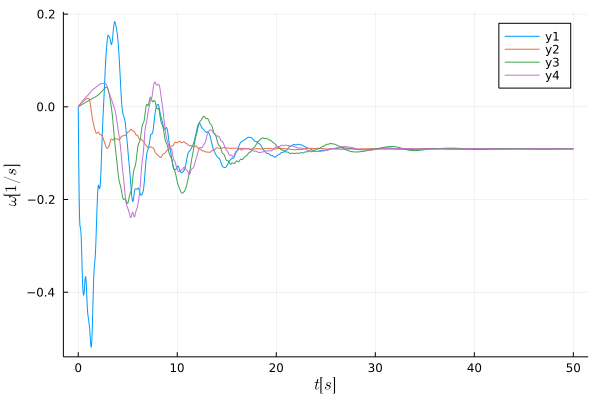

In [17]:
start=1
plot(0:0.02:tf,omegas[20,20,start:end])
plot!(0:0.02:tf,omegas[60,80,start:end])
plot!(0:0.02:tf,omegas[10,100,start:end])
plot!(0:0.02:tf,omegas[24,121,start:end])
xlabel!("\$t[s]\$")
ylabel!("\$\\omega[1/s]\$")

In [18]:
ts2, thetas2, omegas2 = perform_dyn_sim(isinside, n, bx, by, p.+dp, m, d, th0, interval=200, Ndt=Int64(3E5))

NIter: 200 Omega: -0.0026440777757512266
NIter: 400 Omega: -0.005251757428732678
NIter: 600 Omega: -0.00782653517333854
NIter: 800 Omega: -0.010344424846941872
NIter: 1000 Omega: -0.012809582675662992
NIter: 1200 Omega: -0.015223605397523647
NIter: 1400 Omega: -0.017581963463333804
NIter: 1600 Omega: -0.019887023372264487
NIter: 1800 Omega: -0.022140266660470285
NIter: 2000 Omega: -0.02434666498733983
NIter: 2200 Omega: -0.026508225869351202
NIter: 2400 Omega: -0.02862639372147225
NIter: 2600 Omega: -0.03070360662480316
NIter: 2800 Omega: -0.032739899064509505
NIter: 3000 Omega: -0.03473335805213866
NIter: 3200 Omega: -0.03668280861054129
NIter: 3400 Omega: -0.03858695187877174
NIter: 3600 Omega: -0.04044196321821652
NIter: 3800 Omega: -0.042245902472851975
NIter: 4000 Omega: -0.043996666615808325
NIter: 4200 Omega: -0.04569074530955748
NIter: 4400 Omega: -0.0473276088936789
NIter: 4600 Omega: -0.048905557639159186
NIter: 4800 Omega: -0.05042309966114061
NIter: 5000 Omega: -0.051881710

NIter: 40200 Omega: -0.050970305283121936
NIter: 40400 Omega: -0.05196657712693541
NIter: 40600 Omega: -0.05297370107142104
NIter: 40800 Omega: -0.053990409694249744
NIter: 41000 Omega: -0.05501407092283288
NIter: 41200 Omega: -0.05604243420426617
NIter: 41400 Omega: -0.05707325534849266
NIter: 41600 Omega: -0.05810382788105364
NIter: 41800 Omega: -0.059132474226725004
NIter: 42000 Omega: -0.060157166536471664
NIter: 42200 Omega: -0.061176478175340186
NIter: 42400 Omega: -0.06218901189475284
NIter: 42600 Omega: -0.06319294461504704
NIter: 42800 Omega: -0.06418817440371115
NIter: 43000 Omega: -0.0651729711619826
NIter: 43200 Omega: -0.06614683729660574
NIter: 43400 Omega: -0.06710898054456625
NIter: 43600 Omega: -0.06805833487405741
NIter: 43800 Omega: -0.06899571998444104
NIter: 44000 Omega: -0.06992069227714459
NIter: 44200 Omega: -0.07083359589248495
NIter: 44400 Omega: -0.07173392426722167
NIter: 44600 Omega: -0.07262137816255529
NIter: 44800 Omega: -0.07349670001070524
NIter: 45000

NIter: 80400 Omega: -0.061404472225101564
NIter: 80600 Omega: -0.06144845603974558
NIter: 80800 Omega: -0.06151474418029405
NIter: 81000 Omega: -0.06160401579601831
NIter: 81200 Omega: -0.061716235116905556
NIter: 81400 Omega: -0.061850439105369755
NIter: 81600 Omega: -0.06200575429958079
NIter: 81800 Omega: -0.06218107600883338
NIter: 82000 Omega: -0.062375507078636434
NIter: 82200 Omega: -0.06258753795714776
NIter: 82400 Omega: -0.06281542939105415
NIter: 82600 Omega: -0.06305848786241547
NIter: 82800 Omega: -0.06331471102072214
NIter: 83000 Omega: -0.06358271809601324
NIter: 83200 Omega: -0.06386190800515232
NIter: 83400 Omega: -0.06415100825905573
NIter: 83600 Omega: -0.06444958730411147
NIter: 83800 Omega: -0.06475639235079003
NIter: 84000 Omega: -0.06507165304801946
NIter: 84200 Omega: -0.06539460257992188
NIter: 84400 Omega: -0.06572529548065574
NIter: 84600 Omega: -0.06606477655882864
NIter: 84800 Omega: -0.06641169584451759
NIter: 85000 Omega: -0.06676705014517914
NIter: 85200

NIter: 120000 Omega: -0.08570658573982058
NIter: 120200 Omega: -0.08547861374769532
NIter: 120400 Omega: -0.08525596462045133
NIter: 120600 Omega: -0.08503873130316092
NIter: 120800 Omega: -0.084827890064097
NIter: 121000 Omega: -0.08462308835654614
NIter: 121200 Omega: -0.08442442669039742
NIter: 121400 Omega: -0.08423222611296263
NIter: 121600 Omega: -0.08404605591007278
NIter: 121800 Omega: -0.08386655943455511
NIter: 122000 Omega: -0.08369391698799146
NIter: 122200 Omega: -0.08352754359205726
NIter: 122400 Omega: -0.08336834125270817
NIter: 122600 Omega: -0.08321604669073075
NIter: 122800 Omega: -0.08307048597643826
NIter: 123000 Omega: -0.08293210842845547
NIter: 123200 Omega: -0.08280055586900366
NIter: 123400 Omega: -0.082675998826606
NIter: 123600 Omega: -0.0825581147986745
NIter: 123800 Omega: -0.08244687264162937
NIter: 124000 Omega: -0.08234221244041857
NIter: 124200 Omega: -0.08224354062769065
NIter: 124400 Omega: -0.08215085699549622
NIter: 124600 Omega: -0.082063849765443

NIter: 159200 Omega: -0.09205482545396089
NIter: 159400 Omega: -0.09196768977239363
NIter: 159600 Omega: -0.09188061804503435
NIter: 159800 Omega: -0.09179374566347293
NIter: 160000 Omega: -0.09170670133962297
NIter: 160200 Omega: -0.09162041263574187
NIter: 160400 Omega: -0.09153434178909638
NIter: 160600 Omega: -0.09144926371704731
NIter: 160800 Omega: -0.09136527983061178
NIter: 161000 Omega: -0.0912819783236835
NIter: 161200 Omega: -0.09120005540559833
NIter: 161400 Omega: -0.09111905569240608
NIter: 161600 Omega: -0.09103941583606624
NIter: 161800 Omega: -0.09096153200115602
NIter: 162000 Omega: -0.09088486136360358
NIter: 162200 Omega: -0.0908099678018084
NIter: 162400 Omega: -0.0907366759759495
NIter: 162600 Omega: -0.09066499848406281
NIter: 162800 Omega: -0.09059556470527266
NIter: 163000 Omega: -0.09052778265746113
NIter: 163200 Omega: -0.09046226976502598
NIter: 163400 Omega: -0.09039899097940063
NIter: 163600 Omega: -0.09033739904995162
NIter: 163800 Omega: -0.0902782282696

NIter: 198400 Omega: -0.09231980299719623
NIter: 198600 Omega: -0.0923135940094007
NIter: 198800 Omega: -0.09230513217385503
NIter: 199000 Omega: -0.09229529929646967
NIter: 199200 Omega: -0.0922836024424033
NIter: 199400 Omega: -0.09226966947873062
NIter: 199600 Omega: -0.09225432849789035
NIter: 199800 Omega: -0.09223682788210708
NIter: 200000 Omega: -0.09221765083784113
NIter: 200200 Omega: -0.0921972044036758
NIter: 200400 Omega: -0.09217489829825679
NIter: 200600 Omega: -0.09215153846765557
NIter: 200800 Omega: -0.09212695091879312
NIter: 201000 Omega: -0.09210113154903134
NIter: 201200 Omega: -0.0920746971046503
NIter: 201400 Omega: -0.09204716695751447
NIter: 201600 Omega: -0.09201876863100361
NIter: 201800 Omega: -0.0919897039785602
NIter: 202000 Omega: -0.09195954222336679
NIter: 202200 Omega: -0.09192868852369122
NIter: 202400 Omega: -0.0918969740076959
NIter: 202600 Omega: -0.09186425051330174
NIter: 202800 Omega: -0.09183086573491259
NIter: 203000 Omega: -0.0917963991377845

NIter: 237600 Omega: -0.0919407658073232
NIter: 237800 Omega: -0.09195680144814068
NIter: 238000 Omega: -0.09197194658549887
NIter: 238200 Omega: -0.09198595217006943
NIter: 238400 Omega: -0.09199916801822444
NIter: 238600 Omega: -0.09201134940960734
NIter: 238800 Omega: -0.09202256025149698
NIter: 239000 Omega: -0.09203289175094342
NIter: 239200 Omega: -0.09204183282381911
NIter: 239400 Omega: -0.09204959624427204
NIter: 239600 Omega: -0.09205621978873976
NIter: 239800 Omega: -0.0920614794694148
NIter: 240000 Omega: -0.0920657666434528
NIter: 240200 Omega: -0.09206869457027421
NIter: 240400 Omega: -0.0920703124090047
NIter: 240600 Omega: -0.09207081926877927
NIter: 240800 Omega: -0.09206981892828205
NIter: 241000 Omega: -0.09206787523435027
NIter: 241200 Omega: -0.09206474550742841
NIter: 241400 Omega: -0.09206035918627002
NIter: 241600 Omega: -0.0920552565158581
NIter: 241800 Omega: -0.09204894194378062
NIter: 242000 Omega: -0.09204184116036875
NIter: 242200 Omega: -0.092034128078352

NIter: 276800 Omega: -0.09061345903996508
NIter: 277000 Omega: -0.09062779852331154
NIter: 277200 Omega: -0.09064236753190244
NIter: 277400 Omega: -0.09065700734178897
NIter: 277600 Omega: -0.09067117326515886
NIter: 277800 Omega: -0.0906855745037726
NIter: 278000 Omega: -0.09069965324947153
NIter: 278200 Omega: -0.09071366709522301
NIter: 278400 Omega: -0.0907279748228066
NIter: 278600 Omega: -0.09074184828715871
NIter: 278800 Omega: -0.09075594765596164
NIter: 279000 Omega: -0.09076993157927596
NIter: 279200 Omega: -0.09078360173179456
NIter: 279400 Omega: -0.09079760139553085
NIter: 279600 Omega: -0.09081132702453744
NIter: 279800 Omega: -0.09082514452204961
NIter: 280000 Omega: -0.09083920195665604
NIter: 280200 Omega: -0.09085287502210593
NIter: 280400 Omega: -0.09086667602118001
NIter: 280600 Omega: -0.09088024328128265
NIter: 280800 Omega: -0.0908934982561308
NIter: 281000 Omega: -0.09090689993230949
NIter: 281200 Omega: -0.0909199314784106
NIter: 281400 Omega: -0.09093285346110

([0.0, 0.02, 0.04, 0.060000000000000005, 0.08, 0.1, 0.12000000000000001, 0.14, 0.16, 0.18000000000000002  …  29.82, 29.84, 29.860000000000003, 29.880000000000003, 29.900000000000002, 29.92, 29.94, 29.96, 29.98, 30.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 

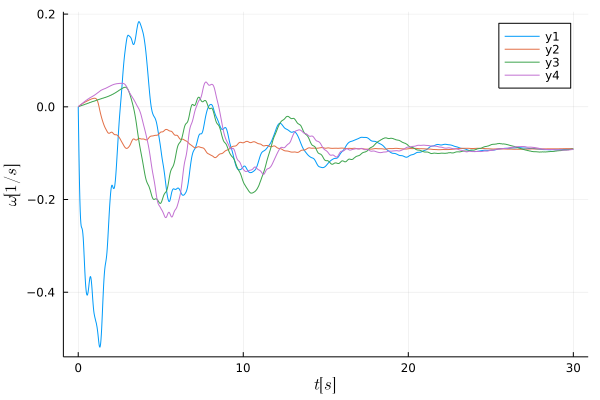

In [20]:
start=1
plot(0:0.02:30,omegas2[20,20,start:end])
plot!(0:0.02:30,omegas2[60,80,start:end])
plot!(0:0.02:30,omegas2[10,100,start:end])
plot!(0:0.02:30,omegas2[24,121,start:end])
xlabel!("\$t[s]\$")
ylabel!("\$\\omega[1/s]\$")